In [21]:
from tqdm import tqdm
import io
import os
import pandas as pd
import random
import replicate
import requests
import urllib.request
from mako.template import Template
import glob 
import random

from dotenv import load_dotenv
load_dotenv()

True

In [22]:
# Data from https://databank.worldbank.org/reports.aspx?source=2&series=SP.POP.0014.TO.ZS&country=#advancedDownloadOptions

df_all = pd.read_csv(io.StringIO("""
Series Name,Series Code,Country Name,Country Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],1967 [YR1967],1968 [YR1968],1969 [YR1969],1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
"Population ages 15-64, total",SP.POP.1564.TO,East Asia & Pacific,EAS,591330917,591306341,596650124,607942714,620437695,635596330,650166491,666633744,685395008,705345858,725242798,744322348,762309372,780376951,798840982,817492525,836361494,855901051,877014271,899762231,923248889,949132278,976173551,1003209455,1029536658,1055952665,1080104509,1104868779,1129257137,1152829240,1175913938,1194533556,1214870264,1235990951,1256426918,1275133071,1298278556,1317192157,1334290934,1352831203,1374625599,1394134139,1417200473,1442083182,1465674539,1486414447,1505615423,1521915581,1536213425,1549092025,1561282110,1572487143,1584582794,1595750608,1605363330,1613003236,1618128344,1622510549,1624965070,1626414566,1626952699,1626321433
"Population ages 15-64, total",SP.POP.1564.TO,North America,NAC,119241674,120905664,122782382,124830127,126991852,129099490,131164241,133262344,135345509,137495518,140016536,143178951,145874886,148463869,151094409,153911325,156203077,158680969,161249858,163808519,166072224,168263735,170305464,172133041,173774834,175359195,176737185,178102924,179476843,181014431,182841841,184820578,186983991,189169621,191397767,193767054,196063017,198712188,201467992,204277217,207073427,209774743,212270493,214581102,217112833,219741003,221904132,224171676,226477065,228520092,230257098,231642832,233008738,234187782,235350379,236377436,237470108,238267475,238820162,239213147,240617187,239922262
"Population ages 15-64, total",SP.POP.1564.TO,Middle East & North Africa,MEA,56181834,57260507,58422417,59670041,61081741,62676681,64185636,65957853,67875780,69908359,72023819,73996003,76078014,78315017,80670870,83162222,85672688,88331724,91157858,94181198,97386840,100589892,104005620,107592376,111296871,115124623,118744424,122531462,126453675,130497992,135692884,140102969,143343169,148069644,152953749,159066750,164307499,169627179,175021446,180587142,186353181,192333531,198478418,204774073,211192199,217705027,224368202,231132026,237857343,244411105,250637992,256634980,262323391,267715870,272888905,277913177,282414339,286948305,291525878,296137397,300813544,305762764
"Population ages 15-64, total",SP.POP.1564.TO,Latin America & Caribbean,LCN,118492231,121299785,124194897,127228404,130479851,133992490,137361737,141068604,145043573,149177099,153421023,157663312,162025365,166534576,171234612,176137706,181022066,186058637,191257564,196615093,202127070,207562787,213199439,218969030,224800914,230664367,236406703,242206815,248069299,254013037,260051757,266078151,272143766,278287179,284537520,290902018,297339000,303879235,310467296,317040195,323557983,329942582,336255109,342507423,348737661,354970188,361191279,367443451,373703483,379916783,385962075,391998814,397865235,403555281,409054390,414359582,419430144,424334052,429008545,433524856,437831998,441834502
"Population ages 15-64, total",SP.POP.1564.TO,Europe & Central Asia,ECS,422644167,425695345,429603223,434150513,438954373,443753590,447678153,451815543,456056985,460399712,464515716,468758971,473383473,477977037,482581068,487242150,491138394,495192692,499559201,504380741,509750172,515104018,520538550,525909073,531121511,535877006,539515311,542887964,546071163,549131507,551768185,553590876,555491259,557513033,559310304,561100991,563338794,565819734,568510993,571290074,573882120,575831133,578093812,580885112,584028011,587374785,590025637,593138114,596435227,599191513,601216402,601185109,601683563,602218018,602505089,602588418,602430853,601839723,601047251,599995431,598749638,596572837
"Population ages 15-64, total",SP.POP.1564.TO,South Asia,SAS,322627769,327615680,332677546,338091518,344314321,351558498,358382452,366364881,375280422,384761522,394611457,403792006,413479621,423703666,434557745,446076266,456835063,468476456,480843562,493735497,507027252,519448530,532372734,545802699,559813324,574436600,587902262,602313938,617525949,633358475,649732210,665582743,682073764,699225206,717107989,735729478,753852355,772654490,792091234,812067049,832477690,851891682,871871841,892259736,912868725,933578443,953244288,972986693,992836700,1012945039,1033399636,1053148503,1073428550,1094128367,1114725484,1134924064,1154928702,1174142157,1192878573,1211598543,1230531679,1248060194
"Population ages 15-64, total",SP.POP.1564.TO,Sub-Saharan Africa,SSF,123035913,125300789,127809933,130552687,133532220,136746720,139513785,142618780,146012825,149643175,153488079,156960451,160724656,164781954,169149540,173828729,178129085,182832225,187862860,193147172,198650222,203653338,209004984,214712395,220806885,227300065,233361943,239931996,246955442,254387241,262210613,269694442,277666265,286086684,294907151,304086327,312491138,321345265,330623084,340325278,350447716,359900034,369913317,380432393,391392973,402771598,413761437,425323071,437458072,450189752,463533762,476776542,490769968,505470772,520837596,536849921,552953754,569819406,587403798,605652965,624523061,643449292
"Population ages 15-64, total",SP.POP.1564.TO,World,WLD,1753554505,1769384111,1792140522,1822466004,1855792053,1893423799,1928452495,1967721749,2011010102,2056731243,2103319428,2148672042,2193875387,2240153070,2288129226,2337850923,2385361867,2435473754,2488945174,2545630451,2604262669,2663754578,2725600342,2788328069,2851150997,2914714521,2972772337,3032843878,3093809508,3155231923,3218211428,3274403315,3332572478,3394342318,3456641398,3519785689,3585670359,3649230248,3712472979,3778418158,3848417716,3913807844,3984083463,4057523021,4131006941,4202555491,4270110398,4336110612,4400981315,4464266309,4526289075,4583873923,4643662239,4703026698,4760725173,4816015834,4867756244,4917861667,4965649277,5012536905,5060019806,5101923284
"Population ages 0-14, total",SP.POP.0014.TO,East Asia & Pacific,EAS,410016138,411670584,420377811,434299905,446787786,457683979,471233449,481727788,491163369,501362331,512578907,525900955,537681069,548445709,557360994,563389367,566526225,567277690,566282945,564038509,560641674,555229390,551019502,546896268,542360499,538352117,537967971,538487599,539668557,540929764,541752520,546104581,546731748,545442649,544606167,545000233,539856188,538762970,538888433,536135851,529047563,523620592,513552168,500829098,489101098,480345333,472654727,467602021,464868768,462942816,461110804,460227448,460033380,460055960,460262036,460530653,461384879,461993200,462013472,461597150,460647223,458581784
"Population ages 0-14, total",SP.POP.0014.TO,North America,NAC,61490094,62766316,63667848,64273994,64713122,64973912,65060188,65000330,64768734,64399304,64039388,63482397,62729455,61897877,60989391,60061359,59502091,58843090,58159398,57580235,57097785,56825485,56693681,56679709,56742360,56892177,57355087,57870678,58435544,59082750,59834493,60941067,62056322,63063806,63904377,64592737,65392166,65994479,66415681,66778398,67117883,67193035,67357240,67482043,67524541,67406606,67783023,67960216,68030810,68064528,68105855,68031898,67877782,67673586,67510460,67367411,67199745,67112990,67030611,66861217,66903006,66574558
"Population ages 0-14, total",SP.POP.0014.TO,Middle East & North Africa,MEA,45133212,46792986,48497541,50193182,51838856,53402408,55120082,56743273,58270833,59779387,61295624,62988522,64644907,66319948,68024045,69791617,71724907,73732292,75834645,78071380,80465476,83165001,85974742,88860461,91754762,94611495,97679861,100603572,103349738,105855502,109026829,111035695,112027100,113339715,114310997,115454181,115716760,115813681,115741784,115544966,115244420,114829451,114351022,113910285,113648301,113656688,113872182,114350334,115125233,116202183,117536377,119056274,120857962,122887759,125025313,127166588,129697289,132002490,134181935,136328184,138454775,140313894
"Population ages 0-14, total",SP.POP.0014.TO,Latin America & Caribbean,LCN,93310150,96274600,99337027,102418831,105387010,108169251,111130413,113817790,116304960,118704296,121068483,123462852,125814398,128101687,130279634,132335525,134425062,136442293,138401619,140324104,142228524,144306862,146307045,148249993,150148117,151989048,153854123,155633102,157313127,158871482,160292930,161603652,162816462,163908765,164863983,165676465,166315940,166812532,167174010,167415272,167538329,167548611,167455753,167263978,166975963,166586701,166095875,165479362,164759990,163985382,163170525,162365023,161629534,160933950,160217491,159451723,158722056,157918383,157091360,156346711,155704497,155197446
"Population ages 0-14, total",SP.POP.0014.TO,Europe & Central Asia,ECS,187007947,190237459,192803147,194743883,196299864,197555420,198521092,199075783,199258682,199177137,198811232,198073427,197538062,196959690,196192008,195195340,194595395,193602663,192430916,191379115,190631221,190200084,190001715,189999400,190089225,190123731,190471503,190707928,190787864,190629271,190073260,189687665,188768032,187423034,185676043,183666990,180996138,178502572,175993838,173237161,170202635,167301569,164283696,161387834,158872613,156874823,155588710,154777247,154453580,154409452,154617630,155485150,156561802,157859275,159325493,160887210,162322143,163726985,165005865,165954730,166428067,166226046
"Population ages 0-14, total",SP.POP.0014.TO,South Asia,SAS,232283979,238814891,245721728,252754681,259486089,265711778,272547592,278735159,284460461,290040491,295644064,301988861,308236309,314423265,320542435,326613668,333829567,340778449,347595295,354445685,361419860,369533463,377681865,385809128,393768042,401465851,410320517,418541613,426298960,433815473,441183071,448961874,456451189,463542363,470045506,475853456,481727623,486937860,491515453,495557605,499155682,503421395,507076659,510212825,512938092,515292856,518073068,520494970,522480638,523836930,524436326,524870789,524276193,522991795,521465092,519984159,518073514,516728532,515602354,514143512,512157812,511184023
"Population ages 0-14, total",SP.POP.0014.TO,Sub-Saharan Africa,SSF,97324208,100202375,103070603,105935186,108783346,111613216,115018840,118322249,121595199,124919752,128340483,132347009,136389831,140476963,144601154,148767676,153573227,158338303,163121795,167988873,172958812,178685082,184390298,190080878,195751370,201398093,207747985,213969021,220069700,226041938,231859208,238165490,244243670,250139547,255919305,261630747,268368309,275012266,281616738,288227476,294882286,302551744,310185735,317886599,325783155,333946837,342963428,352123385,361419257,370804675,380246654,390233850,400137836,409968937,419732486,429416266,439380539,449142367,458698435,468050622,477201675,486549534
"Population ages 0-14, total",SP.POP.0014.TO,World,WLD,1126565728,1146759211,1173475705,1204619662,1233296073,1259109964,1288631656,1313422372,1335822238,1358382698,1381778181,1408244023,1433034031,1456625139,1477989661,1496154552,1514176474,1529014780,1541826613,1553827901,1565443352,1577945367,1592068848,1606575837,1620614375,1634832512,1655397047,1675813513,1695923490,1715226180,1734022311,1756500024,1773094523,1786859879,1799326378,1811874809,1818373124,1827836360,1837345937,1842896729,1843188798,1846466397,1844262273,1838972662,1834843763,1834109844,1837031013,1842787535,1851138276,1860245966,1869224171,1880270432,1891374489,1902371262,1913538371,1924804010,1936780165,1948624947,1959624032,1969282126,1977497055,1984627285
"Population ages 65 and above, total",SP.POP.65UP.TO,East Asia & Pacific,EAS,40262261,40613792,41024069,41571825,41993778,42405891,44184727,45983981,47842340,49711078,51535456,53774160,55854690,57901805,59960769,62013572,64586795,67179642,69843391,72550125,75221665,78329280,81399543,84359259,87169417,89936300,92762799,95540431,98308159,101185118,104293891,107449050,110894143,114574526,118359475,122144555,126821890,131166680,135328278,139481507,143762077,147949991,152224252,156479759,160471950,164176074,168263701,172059058,175829766,179818790,184286811,189658399,195491334,201891831,209243456,217761668,227984933,239406828,251295990,262904490,273705097,283506038
"Population ages 65 and above, total",SP.POP.65UP.TO,North America,NAC,17848241,18290020,18701770,19101878,19509027,19907598,20383571,20861324,21335758,21810178,22320078,22961685,23510121,24039032,24578169,25143591,25779640,26440785,27138947,27867790,28570658,29196694,29781797,30345701,30914859,31514745,32141006,32761999,33378361,33998601,34637803,35256775,35844952,36370337,36824519,37220521,37549034,37856281,38125500,38385671,38656831,39022080,39357538,39688816,40108579,40612742,41263931,41988341,42833210,43815804,44969079,46248079,47705364,49281533,50962925,52697055,54511390,56286899,58052510,59856818,62018091,63643034
"Population ages 65 and above, total",SP.POP.65UP.TO,Middle East & North Africa,MEA,3888186,4008333,4125460,4238358,4350594,4462110,4602465,4743794,4880290,5016455,5153612,5323346,5490478,5657344,5814924,5963444,6134737,6297028,6454546,6613757,6776266,6976494,7176796,7381338,7597171,7836679,8125550,8435092,8761718,9099745,9495415,9907623,10286367,10698495,11120231,11576036,12016912,12450853,12878489,13304610,13729183,14134214,14532835,14924447,15302977,15668147,16062080,16446816,16840652,17270671,17743558,18251412,18787010,19365002,20010133,20742003,21504412,22348181,23266415,24243915,25274050,26418337
"Population ages 65 and above, total",SP.POP.65UP.TO,Latin America & Caribbean,LCN,7886717,8196979,8508599,8821555,9135848,9452636,9800967,10152627,10508027,10865166,11224590,11632760,12032544,12430166,12833880,13247920,13735943,14229147,14723165,15207994,15680276,16173172,16651334,17127419,17617606,18132840,18728135,19333309,19955884,20604669,21285181,22056490,22847886,23651077,24451001,25242250,26105272,26952643,27797379,28659049,29551187,30531030,31532124,32555440,33597731,34662083,35759625,36872437,38019286,39222499,40491279,41863399,43285717,44788649,46406401,48165821,50013952,51982916,54050067,56222670,58487935,60713310
"Population ages 65 and above, total",SP.POP.65UP.TO,Europe & Central Asia,ECS,55947437,57341072,58782237,60275274,61826484,63453200,65289572,67138750,69000069,70883739,72721180,74798762,76816778,78742995,80641447,82539463,84712248,86910237,88913951,90366510,91099768,91402601,90916091,90073613,89493000,89499608,90446456,91831613,93573293,95515831,97494384,99880631,102341859,104724915,106748010,108340354,110106524,111395794,112463758,113657479,115116169,117132301,119449082,121827942,123788314,125082884,126401289,127227255,127869595,128678103,129884170,131264418,133292884,135717887,138316355,140998346,143932017,146841904,149771150,152657379,155595659,158734594
"Population ages 65 and above, total",SP.POP.65UP.TO,South Asia,SAS,17927782,18509140,19095175,19652112,20142917,20552900,21214128,21808546,22361309,22904079,23455836,24326793,25195780,26048037,26866377,27645636,28627902,29564995,30462886,31329660,32173469,33244640,34260576,35224632,36146896,37039851,38215099,39352992,40456249,41528418,42579912,44111000,45608388,47080206,48540367,50004844,51896224,53754025,55596014,57443298,59312692,61509917,63695545,65851861,67951027,69990248,72293329,74521512,76693476,78828220,80956966,83512867,86035711,88641382,91441446,94508843,98185211,102012475,105974089,110034713,114192911,118658106
"Population ages 65 and above, total",SP.POP.65UP.TO,Sub-Saharan Africa,SSF,6873066,7063844,7241072,7405503,7558095,7699909,7921861,8131375,8329525,8517576,8697674,8977017,9245166,9502593,9749644,9987079,10316626,10638233,10954801,11268193,11579182,11943574,12293613,12632440,12963658,13289846,13725748,14152087,14569191,14978244,15382053,15867027,16336506,16794151,17245616,17696210,18208328,18696806,19160877,19595583,19997588,20504246,20967143,21397175,21807118,22206229,22841983,23462107,24068157,24660783,25244698,26035470,26818077,27599765,28388269,29192310,30195951,31201040,32217278,33254286,34322036,35565161
"Population ages 65 and above, total",SP.POP.65UP.TO,World,WLD,150633690,154023180,157478382,161066505,164516743,167934244,173397291,178820397,184257318,189708271,195108426,201794523,208145557,214321972,220445210,226540705,233893891,241260067,248491687,255204029,261101284,267266455,272479750,277144402,281902607,287249869,294144793,301407523,309002855,316910626,325168639,334528596,344160101,353893707,363289219,372224770,382704184,392273082,401350295,410527197,420125727,430783779,441758519,452725440,463027696,472398407,482885938,492577526,502154142,512294870,523576561,536834044,551416097,567286049,584768985,604066046,626327866,650080243,674627499,699174271,723595779,747238580
"Population, total",SP.POP.TOTL,East Asia & Pacific,EAS,1041673567,1043656626,1058119847,1083884354,1109291332,1135760430,1165660993,1194423916,1224481196,1256501888,1289442011,1324084663,1355934840,1386816705,1416257332,1442992143,1467572978,1490458433,1513242365,1536454977,1559219642,1582802675,1608709544,1634587947,1659196213,1684377898,1710979840,1739049562,1767394678,1795112149,1822134188,1848265154,1872676768,1896190507,1919576721,1942464423,1965146473,1987315524,2008705487,2028650228,2047640091,2065912033,2083186086,2099602481,2115458625,2131146847,2146744105,2161785511,2177119138,2192059400,2206884622,2222577723,2240312711,2257904491,2275075985,2291503725,2307707227,2324120551,2338485387,2351127942,2361517682,2368622859
"Population, total",SP.POP.TOTL,North America,NAC,198624409,202007500,205198600,208253700,211262900,214031100,216659000,219176000,221503000,223759000,226431000,229677632,232168663,234454577,236715369,239169275,241538008,244018243,246601803,249310344,251795337,254340965,256836391,259214381,261488476,263823014,266290660,268793450,271349094,274154622,277373464,281077441,284943859,288662674,292185983,295640057,299064347,302623445,306070116,309502571,312909974,316052361,319048184,321815286,324809693,327824506,331015609,334185120,337406357,340466060,343397156,345987373,348656682,351207902,353888902,356507139,359245796,361731237,363967201,365995094,369602177,370203720
"Population, total",SP.POP.TOTL,Middle East & North Africa,MEA,105203230,108061826,111045418,114101578,117271192,120541198,123908187,127444919,131026902,134704201,138473057,142307871,146213398,150292311,154509840,158917282,163532333,168361040,173447050,178866336,184628581,190731389,197157155,203834175,210648804,217572797,224549836,231570125,238565130,245453236,254215127,261046286,265656639,272107854,278384977,286096967,292041169,297891711,303641719,309436718,315326781,321297196,327362274,333608806,340143477,347029862,354302465,361929175,369823227,377883960,385917928,393942668,401968363,409968633,417924350,425821771,433616042,441298977,448974232,456709496,464542370,472494995
"Population, total",SP.POP.TOTL,Latin America & Caribbean,LCN,219828794,225912719,232183258,238612680,245147710,251760583,258440584,265187879,272006857,278898334,285867424,292913867,300028905,307224818,314508488,321883714,329348136,336897935,344553109,352320721,360211832,368220724,376337306,384527729,392750803,400974913,409183996,417376183,425549887,433708712,441855797,449968703,458041493,466082322,474089591,482060085,490002410,497889881,505687097,513366691,520903474,528283130,535509387,542599527,549590680,556504216,563337657,570091479,576783743,583430021,589932530,596538052,603094656,609595811,615999056,622301041,628493594,634566052,640483827,646431661,652365260,658089208
"Population, total",SP.POP.TOTL,Europe & Central Asia,ECS,666753356,674450666,682397828,690411692,698355574,706070460,712830312,719406020,725725300,731903738,737524825,743140589,749283635,755259488,761029417,766625562,772129341,777422111,782653852,787910910,793299463,798559755,803342746,807903880,812662217,817497806,822470047,827505281,832553390,837438555,841536999,845399658,848878429,851973886,854082087,855490982,856856802,858163120,859296518,860311870,861270071,862339994,863908064,866189044,868783653,871433207,874134287,877278821,880911644,884448855,887904313,890136603,893755804,898022522,902367876,906669764,910870489,914608311,918031055,920807612,922976036,923753699
"Population, total",SP.POP.TOTL,South Asia,SAS,572839530,584939711,597494450,610498308,623943328,637823175,652144171,666908586,682102192,697706091,713711358,730107660,746911710,764174968,781966557,800335570,819292532,838819900,858901743,879510842,900620583,922226632,944315173,966836458,989728262,1012942302,1036437878,1060208544,1084281159,1108702366,1133495194,1158655616,1184133340,1209847774,1235693864,1261587780,1287476203,1313346375,1339202700,1365067953,1390946065,1416822995,1442644044,1468324423,1493757846,1518861546,1543610686,1568003175,1592010815,1615610187,1638792927,1661532158,1683740452,1705761545,1727632022,1749417067,1771187426,1792883164,1814455018,1835776769,1856882402,1877902324
"Population, total",SP.POP.TOTL,Sub-Saharan Africa,SSF,227233184,232567007,238121604,243893375,249873656,256059849,262454482,269072404,275937546,283080501,290526233,298284475,306359650,314761504,323500333,332583481,342018937,351808760,361939456,372404237,383188215,394281992,405688898,417425712,429521914,441988004,454835677,468053103,481594337,495407422,509451875,523726960,538246439,553020385,568072070,583413287,599067774,615054341,631400703,648148338,665327588,682956023,701066197,719716165,738983247,758924664,779566846,800908567,822945490,845655209,869025115,893045863,917725880,943039474,968958352,995458498,1022530245,1050162810,1078319512,1106957870,1136046775,1165563987
"Population, total",SP.POP.TOTL,World,WLD,3032156070,3071596055,3124561005,3189655687,3255145692,3322046795,3392097729,3461619724,3532782993,3606553753,3681975908,3760516757,3836900801,3912984371,3988487336,4062507027,4135432265,4207786422,4281339378,4356778367,4432963653,4511164132,4592387213,4674330282,4755996689,4839176734,4924747934,5012556248,5101287675,5189977062,5280062644,5368139818,5452576967,5537885402,5622085293,5706753581,5789655178,5872284397,5954004340,6034484369,6114324044,6193663732,6272724236,6351855732,6431527221,6511724848,6592711655,6674181848,6757000414,6839553692,6921854591,7003760440,7089254548,7175500378,7261846543,7347679005,7433650819,7519371102,7602716232,7683806444,7763932702,7836630792
""".strip()))
df_all.head()

,Series Name,Series Code,Country Name,Country Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,"Population ages 15-64, total",SP.POP.1564.TO,East Asia & Pacific,EAS,591330917,591306341,596650124,607942714,620437695,635596330,...,1584582794,1595750608,1605363330,1613003236,1618128344,1622510549,1624965070,1626414566,1626952699,1626321433
1,"Population ages 15-64, total",SP.POP.1564.TO,North America,NAC,119241674,120905664,122782382,124830127,126991852,129099490,...,233008738,234187782,235350379,236377436,237470108,238267475,238820162,239213147,240617187,239922262
2,"Population ages 15-64, total",SP.POP.1564.TO,Middle East & North Africa,MEA,56181834,57260507,58422417,59670041,61081741,62676681,...,262323391,267715870,272888905,277913177,282414339,286948305,291525878,296137397,300813544,305762764
3,"Population ages 15-64, total",SP.POP.1564.TO,Latin America & Caribbean,LCN,118492231,121299785,124194897,127228404,130479851,133992490,...,397865235,403555281,409054390,414359582,419430144,424334052,429008545,433524856,437831998,441834502
4,"Population ages 15-64, total",SP.POP.1564.TO,Europe & Central Asia,ECS,422644167,425695345,429603223,434150513,438954373,443753590,...,601683563,602218018,602505089,602588418,602430853,601839723,601047251,599995431,598749638,596572837


In [23]:
df = df_all[['Series Code', 'Country Code', '2020 [YR2020]']].copy()
df.rename(
    columns={'Series Code': 'series', 'Country Code': 'region', '2020 [YR2020]': 'population'},
    inplace=True)
df

,series,region,population
0,SP.POP.1564.TO,EAS,1626952699
1,SP.POP.1564.TO,NAC,240617187
2,SP.POP.1564.TO,MEA,300813544
3,SP.POP.1564.TO,LCN,437831998
4,SP.POP.1564.TO,ECS,598749638
5,SP.POP.1564.TO,SAS,1230531679
6,SP.POP.1564.TO,SSF,624523061
7,SP.POP.1564.TO,WLD,5060019806
8,SP.POP.0014.TO,EAS,460647223
9,SP.POP.0014.TO,NAC,66903006


In [24]:
# Validate data : the two tables should be the same
countries = ['EAS', 'NAC', 'MEA', 'LCN', 'ECS', 'SAS', 'SSF']
df_a = df[df['region'].isin(countries)].groupby('series').sum('population').squeeze()
df_b = df[df['region'] == 'WLD'].set_index('series')[['population']].squeeze()
df_a.sort_index(), df_b.sort_index()

(series
 SP.POP.0014.TO    1977497055
 SP.POP.1564.TO    5060019806
 SP.POP.65UP.TO     723595779
 SP.POP.TOTL       7763932702
 Name: population, dtype: int64,
 series
 SP.POP.0014.TO    1977497055
 SP.POP.1564.TO    5060019806
 SP.POP.65UP.TO     723595779
 SP.POP.TOTL       7763932702
 Name: population, dtype: int64)

In [25]:
# These numbers should be about the same
series = df[df.region == 'WLD'].set_index('series')['population']
print(series['SP.POP.1564.TO'] + series['SP.POP.65UP.TO'] + series['SP.POP.0014.TO'])
print(series['SP.POP.TOTL'])

7761112640
7763932702


In [26]:
TOTAL_POPULATION = 7763932702

In [27]:
df2 = df[(df.region != 'WLD') & (df.series != 'SP.POP.TOTL')]
df2 = df2.replace({'SP.POP.0014.TO': 'child', 'SP.POP.1564.TO': 'adult', 'SP.POP.65UP.TO': 'old person'})
df2 = df2.replace({'EAS': 'east asian', 'NAC': 'north american', 'MEA': 'middle eastern', 'LCN': 'latin american', 'ECS': 'european', 'SAS': 'south asian', 'SSF': 'african'})
df2['population'] = round(df2['population'] / TOTAL_POPULATION * 100, 2)
df2

,series,region,population
0,adult,east asian,20.96
1,adult,north american,3.10
2,adult,middle eastern,3.87
3,adult,latin american,5.64
4,adult,european,7.71
5,adult,south asian,15.85
6,adult,african,8.04
8,child,east asian,5.93
9,child,north american,0.86
10,child,middle eastern,1.78


In [28]:
# For population table
df3 = df[(df.region != 'WLD') & (df.series != 'SP.POP.TOTL')]
df3 = df3.replace({'SP.POP.0014.TO': '0-14', 'SP.POP.1564.TO': '15-64', 'SP.POP.65UP.TO': '65+'})
df3 = df3.replace({'EAS': 'East Asia', 'NAC': 'North America', 'MEA': 'Middle East & North Africa', 'LCN': 'Latin America', 'ECS': 'Europe', 'SAS': 'South Asia', 'SSF': 'Sub-Saharan Africa'})
df3['population'] = df3['population'] / TOTAL_POPULATION
pop_table = df3.pivot_table(index='series', columns='region', values='population')[['South Asia', 'East Asia', 'North America', 'Latin America', 'Sub-Saharan Africa', 'Europe', 'Middle East & North Africa']]
pop_table

region,South Asia,East Asia,North America,Latin America,Sub-Saharan Africa,Europe,Middle East & North Africa
series,,,,,,,
0-14,0.065966,0.059332,0.008617,0.020055,0.061464,0.021436,0.017833
15-64,0.158493,0.209553,0.030992,0.056393,0.080439,0.077119,0.038745
65+,0.014708,0.035253,0.007988,0.007533,0.004421,0.020041,0.003255


Text(50.722222222222214, 0.5, '')

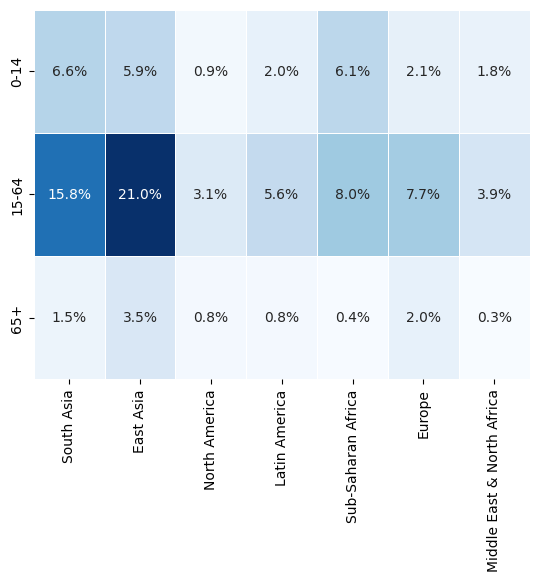

In [29]:
import seaborn as sns
ax = sns.heatmap(pop_table, annot=True, fmt='.1%', cmap='Blues', cbar=False, linewidths=0.5)
ax.set_xlabel('')
ax.set_ylabel('')

In [30]:
prob_dist = df2.set_index(df2['region'] + ' ' + df2['series'])['population']
prob_dist.sort_values(ascending=False)

east asian adult             20.96
south asian adult            15.85
african adult                 8.04
european adult                7.71
south asian child             6.60
african child                 6.15
east asian child              5.93
latin american adult          5.64
middle eastern adult          3.87
east asian old person         3.53
north american adult          3.10
european child                2.14
latin american child          2.01
european old person           2.00
middle eastern child          1.78
south asian old person        1.47
north american child          0.86
north american old person     0.80
latin american old person     0.75
african old person            0.44
middle eastern old person     0.33
Name: population, dtype: float64

In [31]:
prob_dist.sum()  # Should be around 1

99.96

In [32]:
prob_dist = prob_dist / prob_dist.sum()
prob_dist.sum()

0.9999999999999999

In [33]:
people = prob_dist.sample(n=100, replace=True, weights=prob_dist).index.tolist()
people

['east asian adult',
 'south asian child',
 'south asian child',
 'east asian old person',
 'east asian adult',
 'east asian old person',
 'east asian old person',
 'south asian adult',
 'african child',
 'middle eastern adult',
 'latin american child',
 'east asian adult',
 'east asian adult',
 'south asian child',
 'south asian adult',
 'east asian adult',
 'african child',
 'african adult',
 'latin american adult',
 'south asian adult',
 'african child',
 'african adult',
 'south asian adult',
 'african child',
 'european old person',
 'latin american adult',
 'south asian adult',
 'north american adult',
 'north american old person',
 'north american adult',
 'south asian adult',
 'north american adult',
 'south asian adult',
 'south asian old person',
 'east asian adult',
 'east asian child',
 'latin american adult',
 'south asian child',
 'european adult',
 'middle eastern adult',
 'east asian adult',
 'east asian old person',
 'european adult',
 'european adult',
 'african adult

In [36]:
def generate_and_store_face(person: str, dirname: str = './faces') -> str:
    person_dirname = os.path.join(dirname, person.replace(' ', '_'))
    os.makedirs(person_dirname, exist_ok=True)
    model = replicate.models.get("stability-ai/stable-diffusion")
    url = model.predict(prompt=f"profile headshot photo of a {person}, centered, white bg")[0]
    uuid = url.split('/')[-2]
    filename = os.path.join(person_dirname, f'{uuid}.jpg')
    with open(filename, 'wb') as f:
        f.write(requests.get(url).content)
    os.system(f"mogrify -format jpg {filename}")  # Need to actually make it a jpg
    os.system(f"convert {filename} -resize 128x128 {filename[:-4]}_thumb.jpg")

generate_and_store_face('female latin american adult')

In [38]:
# Takes ~11 minutes and costs ~$1.
if True:
    for person in tqdm(people):
        if random.random() > 0.5:
            person = f'female {person}'
        else:
            person = f'male {person}'
        generate_and_store_face(person)


 15%|█▌        | 15/100 [01:53<10:45,  7.60s/it]


KeyboardInterrupt: 

In [39]:
CLASS_MAPPING = {'child': 'child', 'adult': 'adult', 'person': 'senior'}
filenames = glob.glob('faces/**/*_thumb.jpg')
images = ''
for filename in filenames:
    person = filename.split('/')[1].replace('_', ' ')
    type = CLASS_MAPPING[person.split()[-1]]
    images += f'<img x-show="filter === \'{type}\' || filter === \'all\'" src="{filename}" alt="{person}" loading="lazy" />\n'
    
print(images)

<img x-show="filter === 'senior' || filter === 'all'" src="faces/female_east_asian_old_person/c140a479-b2b0-48da-ac2e-348a9a97c57e_thumb.jpg" alt="female east asian old person" loading="lazy" />
<img x-show="filter === 'child' || filter === 'all'" src="faces/male_south_asian_child/0f53f4c3-d47f-4c3c-93e9-e5fa9986aa1e_thumb.jpg" alt="male south asian child" loading="lazy" />
<img x-show="filter === 'child' || filter === 'all'" src="faces/male_south_asian_child/cca2e3cb-5e3e-4753-aaac-88cc8edaa368_thumb.jpg" alt="male south asian child" loading="lazy" />
<img x-show="filter === 'child' || filter === 'all'" src="faces/male_south_asian_child/395c4ce0-6e34-49a8-b18f-24a67a689e58_thumb.jpg" alt="male south asian child" loading="lazy" />
<img x-show="filter === 'child' || filter === 'all'" src="faces/male_south_asian_child/01513fa3-b37d-4f0a-a2f4-f95f8e119a19_thumb.jpg" alt="male south asian child" loading="lazy" />
<img x-show="filter === 'child' || filter === 'all'" src="faces/male_south_as

In [41]:
with open('index.html', 'w') as f:
    f.write(Template(filename='index_template.html').render(images=images))